In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [14]:
Data = pd.read_csv('train.csv')

Data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Exploratory Data Analysis (EDA)

In [15]:
Data.shape

(2000, 21)

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
Data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


I started by loading the dataset and checking its structure. The train.csv file contains 2000 rows and 21 columns: 20 feature variables plus the target price_range. Since all the features are either numeric or binary, preprocessing will be straightforward no need for categorical encoding. I also verified that there are no missing values in the dataset, which simplifies data cleaning. Descriptive statistics (.describe()) confirmed that the ranges of features vary significantly (e.g., battery_power goes up to 1998, while binary features like blue are only 0 or 1). This means scaling will likely be needed later.

# Understanding the Target Variable

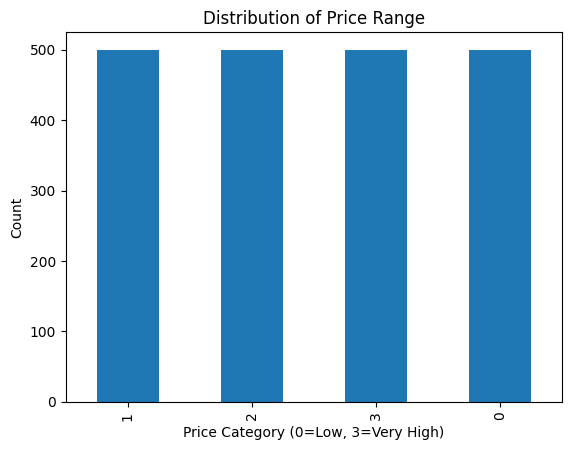

In [18]:
Data['price_range'].value_counts().plot(kind='bar')
plt.title("Distribution of Price Range")
plt.xlabel("Price Category (0=Low, 3=Very High)")
plt.ylabel("Count")
plt.show()

Next, I explored the distribution of the target variable price_range. The dataset is perfectly balanced across the four categories (0, 1, 2, 3), with each having 500 samples. This is an important observation: it means I don’t need to worry about class imbalance, and metrics like accuracy or F1-score will be reliable for evaluation.

# Correlation Analysis

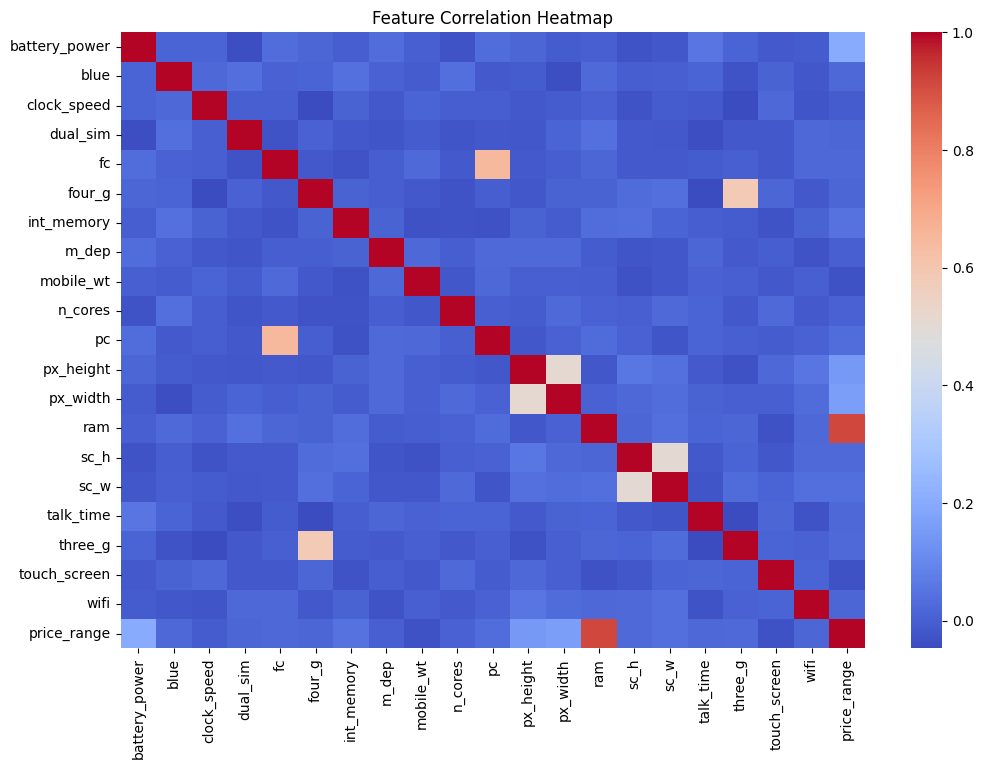

,price_range
price_range,1.000000
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
int_memory,0.044435
sc_w,0.038711
pc,0.033599
three_g,0.023611
sc_h,0.022986


In [19]:
corr = Data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

corr['price_range'].sort_values(ascending=False)

To understand which features drive mobile pricing, I computed correlations with price_range. The heatmap provides a general view of relationships, while sorting correlations reveals specifics:

RAM shows the strongest positive correlation with price_range. This makes sense because higher RAM generally means a more expensive phone.

Battery power and px_height/px_width (screen resolution) also have noticeable positive correlations with price.

Binary features like 4G and touch_screen also show some influence.

Interestingly, features like blue (Bluetooth) or dual_sim have very weak correlations, meaning they don’t play a big role in pricing.

This initial analysis suggests that memory and performance specs are key price drivers, while small features like Bluetooth support don’t significantly affect the price category.

# Univariate Analysis (distributions)

Binary features: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
Continuous-like features: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


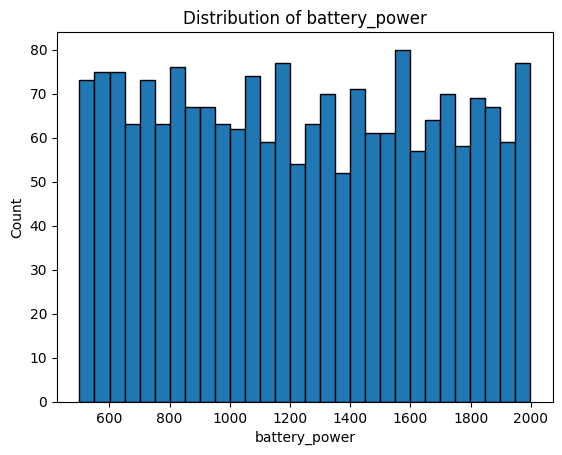

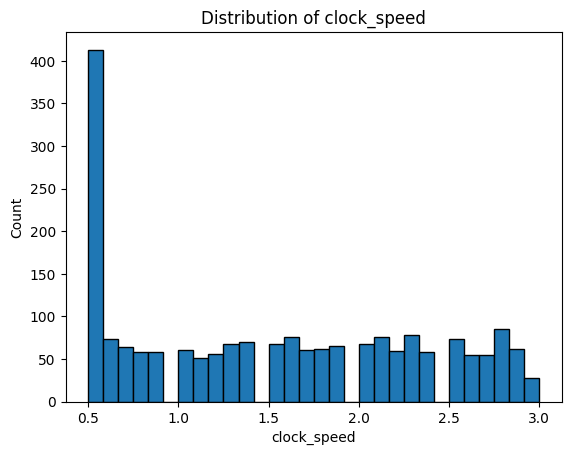

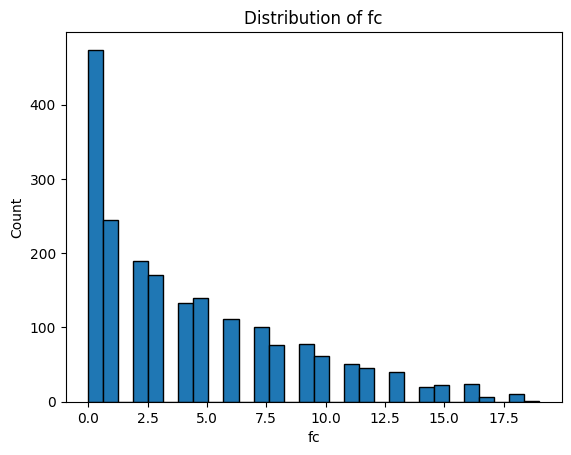

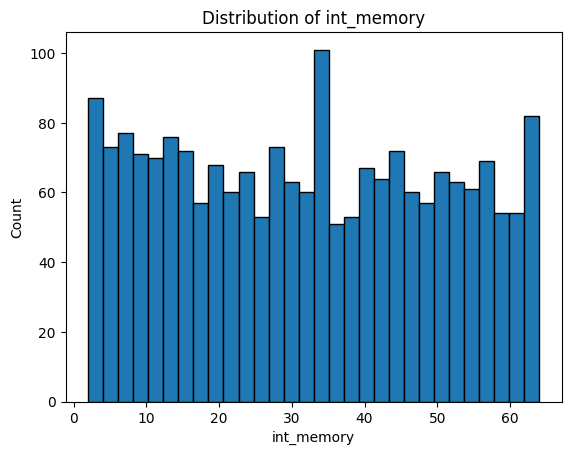

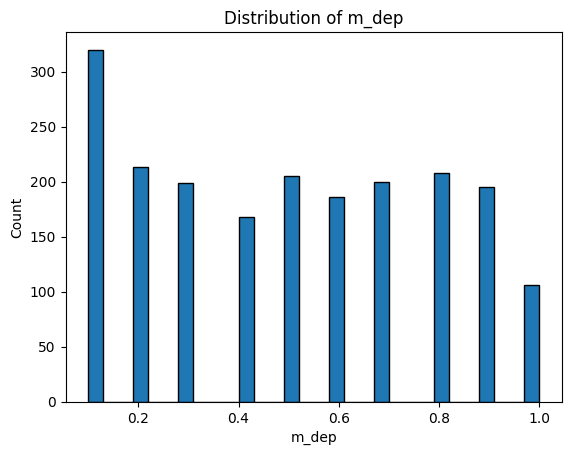

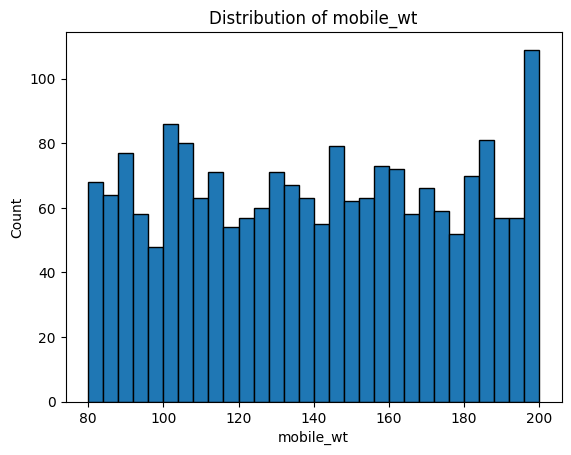

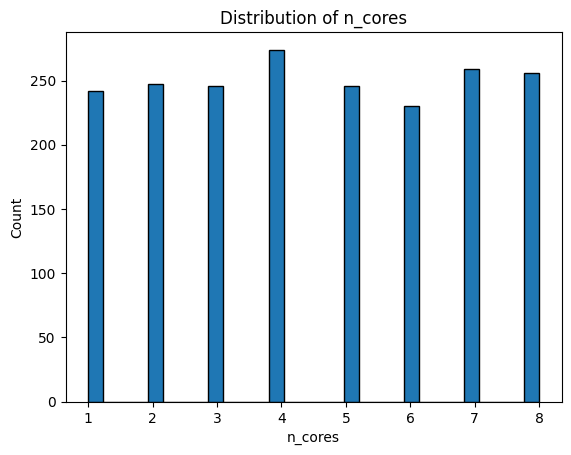

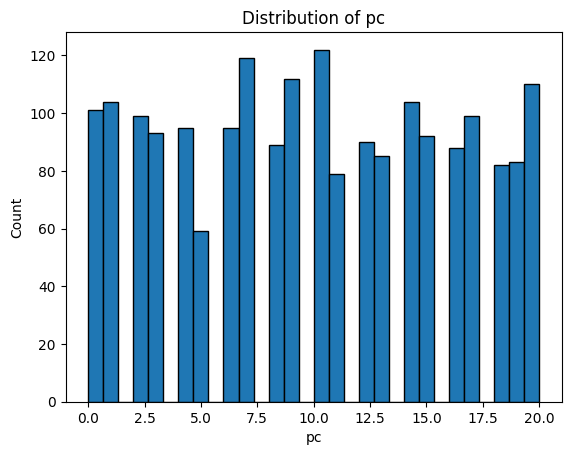

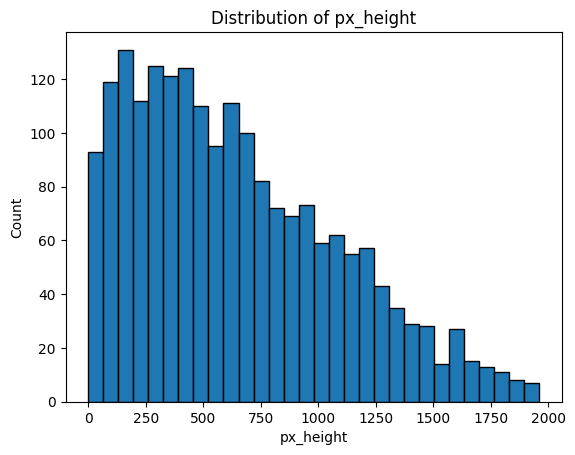

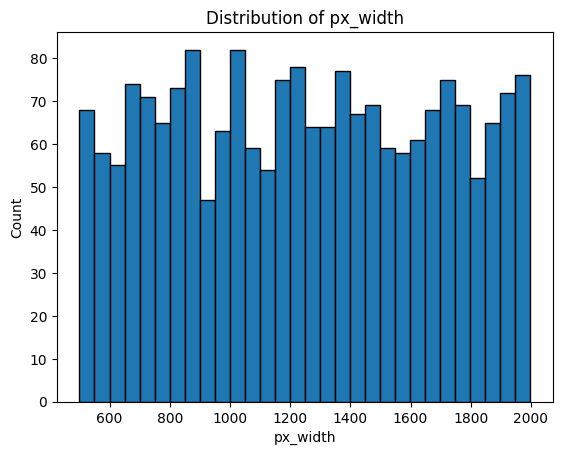

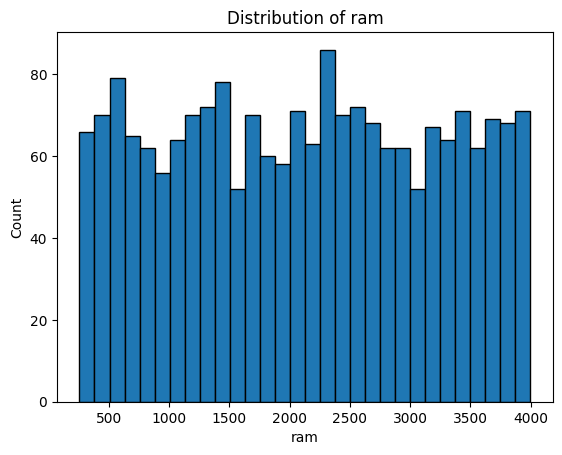

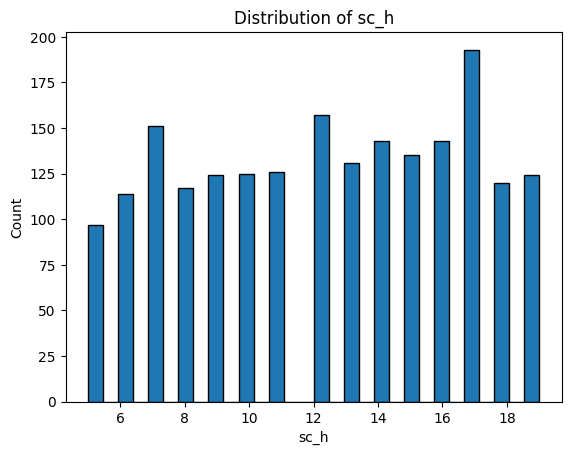

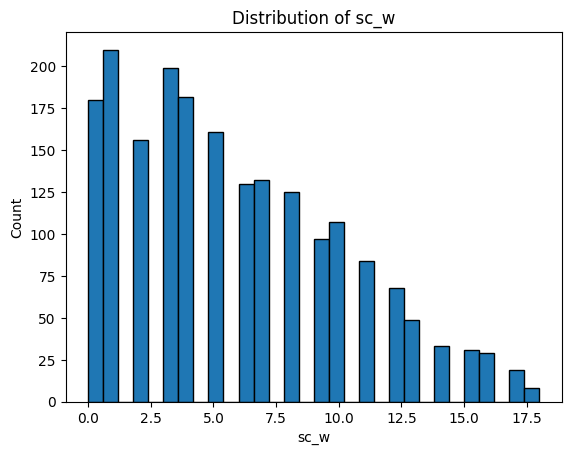

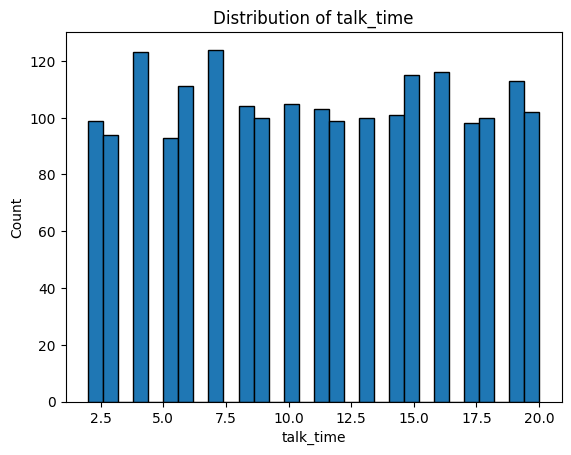

In [20]:
assert 'price_range' in Data.columns, "price_range not found in df"

feature_cols = [c for c in Data.columns if c != 'price_range']

binary_cols = []
cont_cols = []
for col in feature_cols:
    vals = set(Data[col].unique())
    if vals.issubset({0, 1}):
        binary_cols.append(col)
    else:
        cont_cols.append(col)

print("Binary features:", binary_cols)
print("Continuous-like features:", cont_cols)

for col in cont_cols:
    plt.figure()
    plt.hist(Data[col], bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

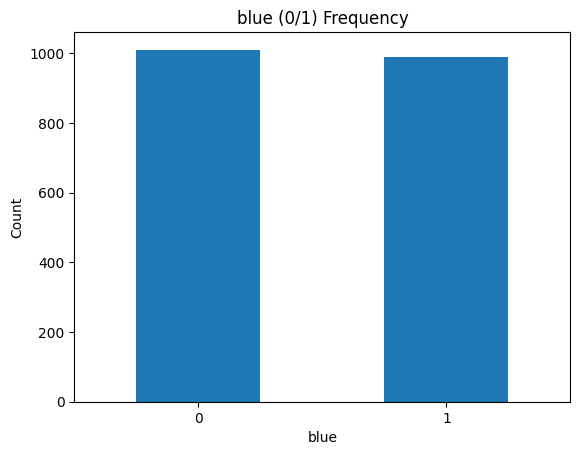

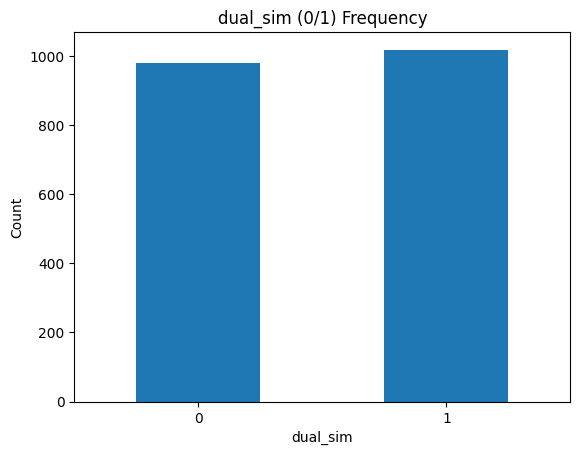

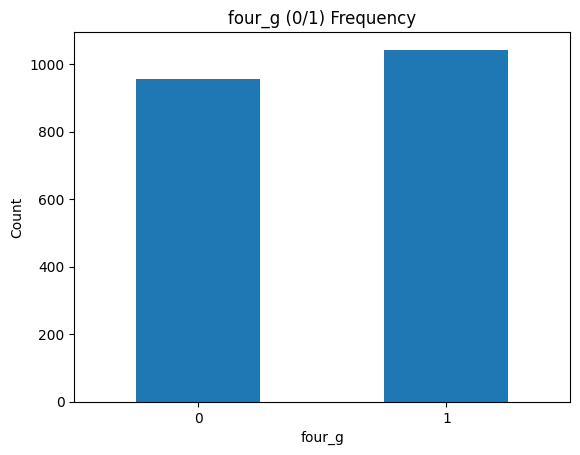

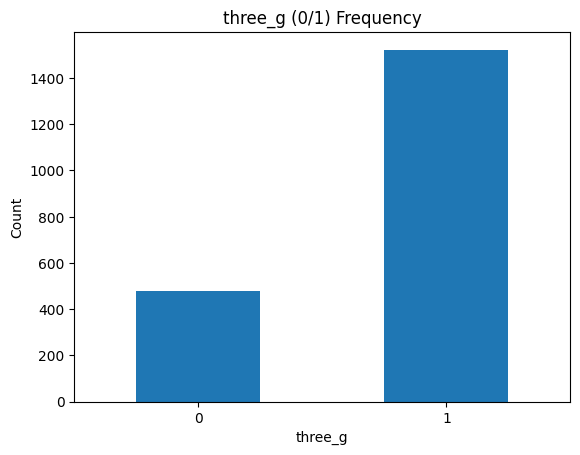

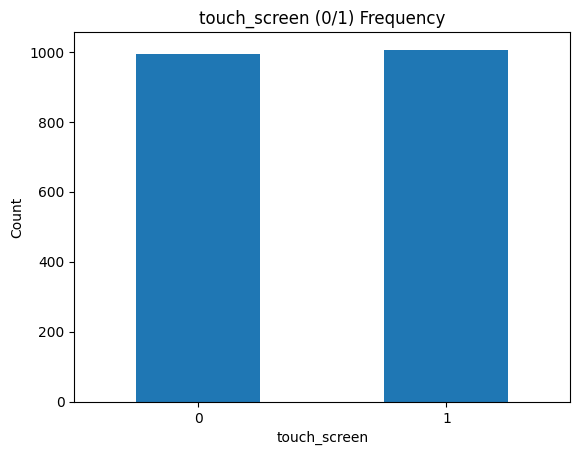

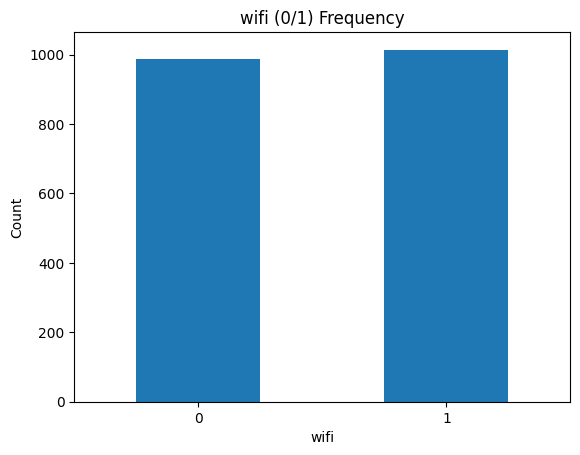

In [21]:
# frequency bars for binary features
for col in binary_cols:
    plt.figure()
    Data[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f"{col} (0/1) Frequency")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

I profiled each feature to understand basic distributions before modeling. I first split columns into binary (0/1 flags like blue, dual_sim, four_g) and continuous-like specs (e.g., battery_power, ram, px_height, px_width, int_memory, mobile_wt).

For continuous features, I plotted histograms to check spread, skew, and potential heavy tails. The plots show that core specs like RAM, battery power, and screen resolution have wide ranges, which supports their potential to differentiate price categories later.

For binary features, I checked 0/1 frequencies to ensure we’re not dealing with near-constant indicators (which would have low predictive value). Most binary flags have a reasonable mix of 0s and 1s, so they’re eligible features.

These distributions also help anticipate preprocessing choices (e.g., scaling continuous features for models like SVM/Logistic Regression, while trees are scale-invariant).

# Bivariate Analysis (features vs. price_range)

<Figure size 600x400 with 0 Axes>

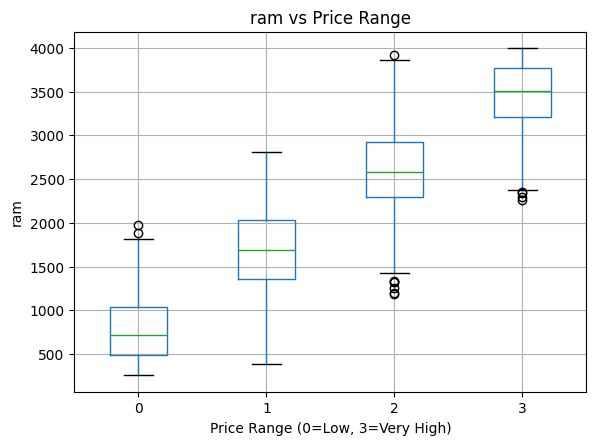

<Figure size 600x400 with 0 Axes>

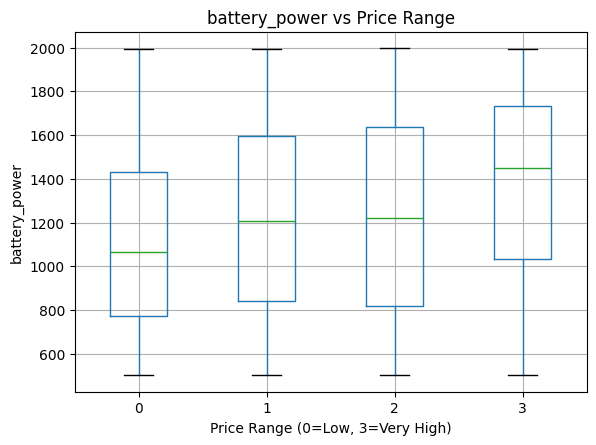

<Figure size 600x400 with 0 Axes>

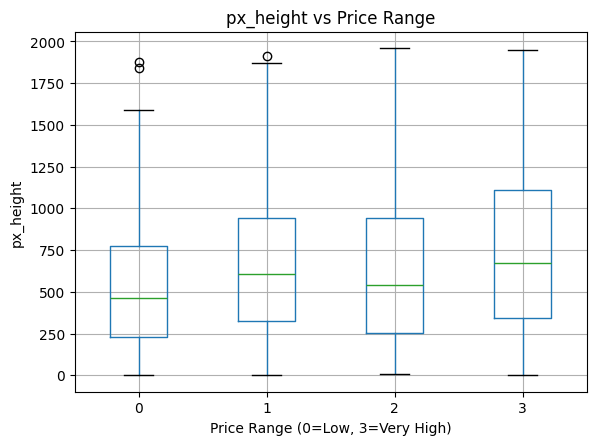

<Figure size 600x400 with 0 Axes>

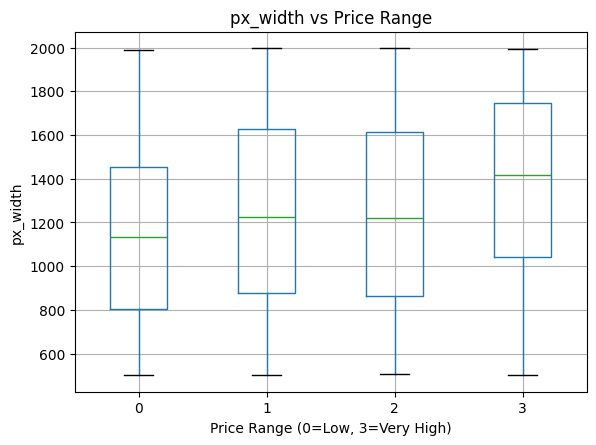

<Figure size 600x400 with 0 Axes>

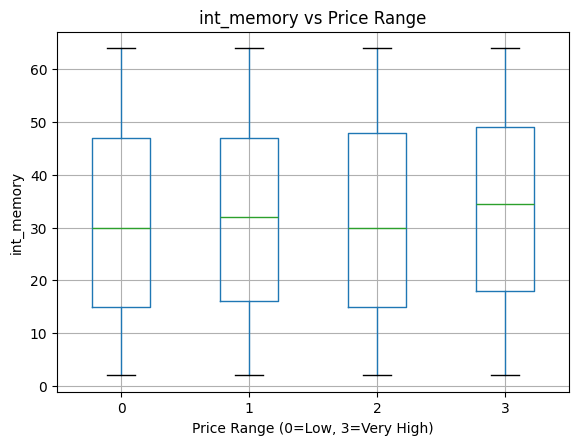

In [22]:
key_features = ['ram', 'battery_power', 'px_height', 'px_width', 'int_memory']

for col in key_features:
    plt.figure(figsize=(6,4))
    Data.boxplot(column=col, by='price_range')
    plt.title(f"{col} vs Price Range")
    plt.suptitle("")
    plt.xlabel("Price Range (0=Low, 3=Very High)")
    plt.ylabel(col)
    plt.show()

To understand how specifications influence pricing, I compared key features against the target variable price_range:

RAM: Clear separation across categories. Phones with higher RAM almost always fall into higher price ranges. This confirms RAM as the strongest driver of pricing.

Battery Power: Higher battery capacity generally pushes a phone into a higher price category, although the separation is less sharp than RAM.

Pixel Height & Width (Screen Resolution): Both features show an upward trend with price range. Premium phones tend to have much sharper displays.

Internal Memory: Internal storage also correlates positively with price, though with more overlap between categories compared to RAM.

Insight: Among all features, RAM is the single best discriminator of phone price, followed by display resolution and battery power. Binary flags like 4G and touch screen will likely play supporting roles but are not as decisive.

# Outlier Analysis

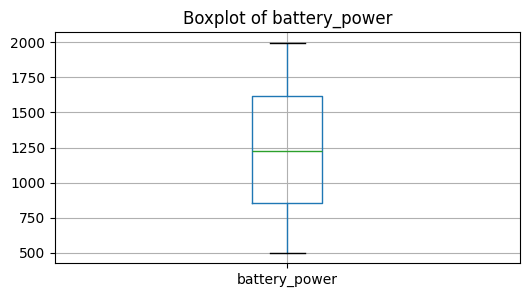

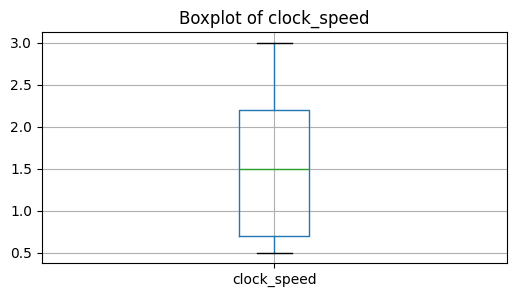

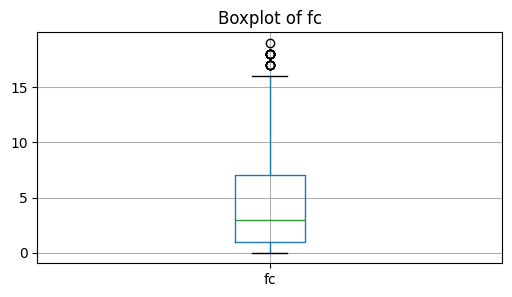

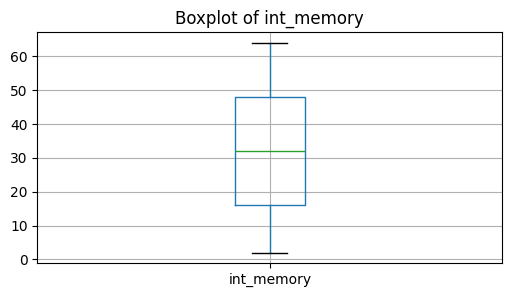

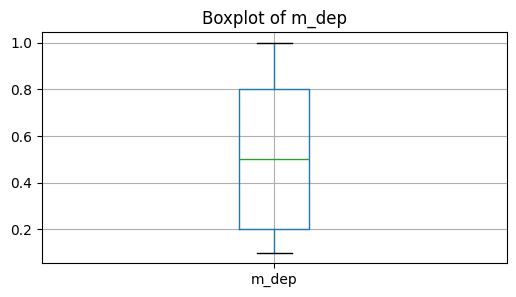

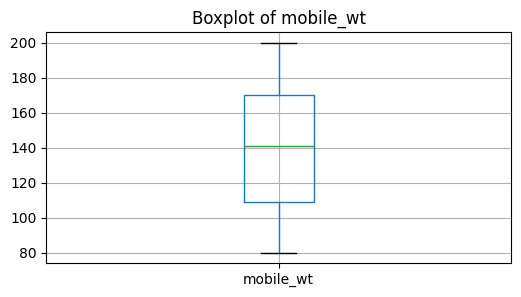

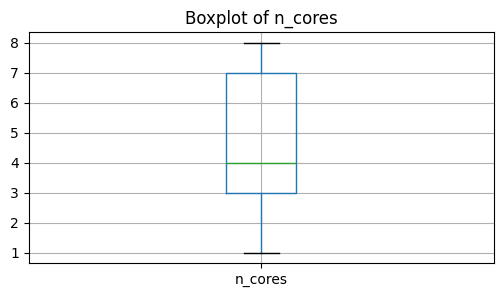

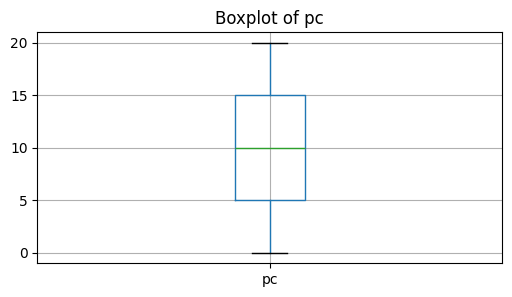

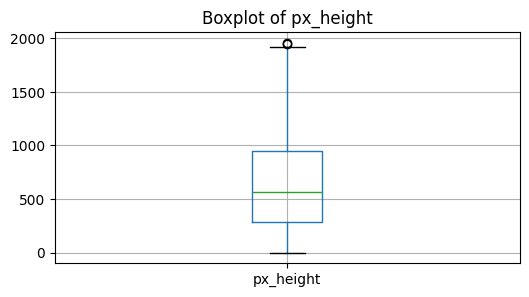

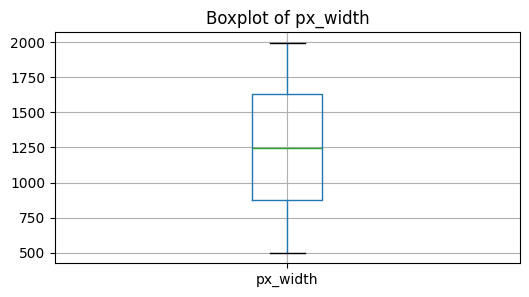

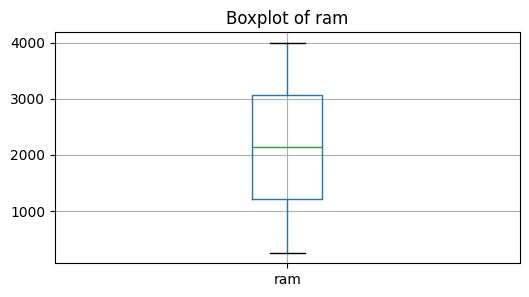

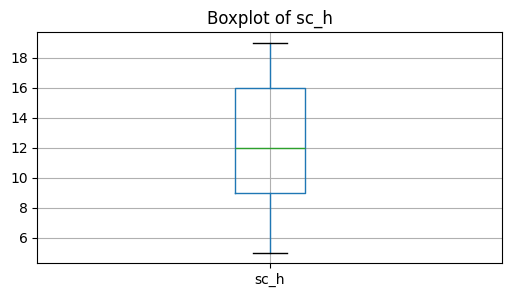

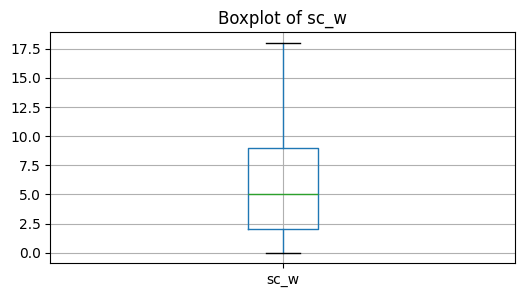

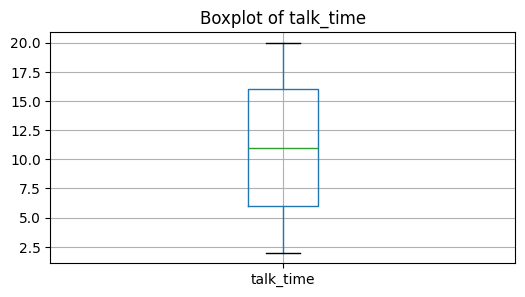

{'battery_power': 0,
 'clock_speed': 0,
 'fc': 18,
 'int_memory': 0,
 'm_dep': 0,
 'mobile_wt': 0,
 'n_cores': 0,
 'pc': 0,
 'px_height': 2,
 'px_width': 0,
 'ram': 0,
 'sc_h': 0,
 'sc_w': 0,
 'talk_time': 0}

In [25]:
cont_cols = [c for c in Data.columns if c not in ['price_range'] and len(Data[c].unique()) > 2]

outlier_summary = {}

for col in cont_cols:
    Q1 = Data[col].quantile(0.25)
    Q3 = Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = Data[(Data[col] < lower_bound) | (Data[col] > upper_bound)][col]

    outlier_summary[col] = len(outliers)

    plt.figure(figsize=(6,3))
    Data.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

outlier_summary

I checked for outliers in all continuous features using the IQR method (values outside 1.5×IQR from Q1 and Q3). Boxplots helped visualize their spread.

Battery Power & Mobile Weight: A few extreme values at the higher end, but they still look plausible (e.g., very high-capacity batteries or heavy phones).

Pixel Height/Width: Some phones have significantly higher resolutions than the median not necessarily errors but premium devices.

RAM: Wide range, but no extreme outliers beyond reasonable phone specs.

Talk Time: Some unusually high values exist but are still within device possibilities.

Since the dataset was curated for a Kaggle competition, these outliers are likely realistic extreme cases rather than errors. Therefore, I will retain them instead of removing, so the model learns to handle premium specs as legitimate signals of higher price.

# EDA Insights (Business Perspective)

From the exploratory analysis, several clear patterns emerged:

RAM is the strongest driver of phone price.

The boxplots show a clear separation of price categories based on RAM.

Higher RAM almost always indicates a higher price range.


**Business Impact:** For Appclick, offering phones with competitive RAM at lower cost could be a key differentiator against established brands.

Battery Power matters but with overlap.

Phones with larger batteries trend toward higher price ranges, though categories overlap.


**Business Impact:** Appclick can use strong battery performance as a selling point in mid-tier devices where differentiation is harder.

Display Resolution (px_height, px_width) influences pricing.

Premium phones consistently have sharper displays.


**Business Impact:**: High-resolution displays are associated with higher market positioning, so Appclick should balance cost and screen quality when targeting price-sensitive segments.

Internal Memory plays a supporting role.

More storage generally leads to higher prices, but with less separation than RAM.


**Business Impact:** While important, storage alone is not enough to justify higher pricing unless combined with RAM and display upgrades.

Binary Features (e.g., 4G, Touch Screen, Bluetooth) have weaker correlations.

These features are now standard across many devices, so they don’t strongly affect pricing.


**Business Impact:** They should be included in models but won’t significantly drive customer perception of value.

Outliers are real premium cases, not errors.

Extreme values in resolution, battery, or weight represent high-end devices.


**Business Impact:** These examples help the model learn what distinguishes “Very High Cost” phones.

# **Data Preprocessing**

**Data Cleaning**
The dataset is already clean:

No missing values (.info() confirmed).

All features are numeric/binary (no encoding needed).

So we don’t need heavy cleaning here.

**Scaling**

Why scale?

Models like Logistic Regression and SVM are sensitive to feature scales.

Tree-based models (Random Forest, XGBoost) are not scale-sensitive, but since we’ll compare multiple models, it’s best to standardize.

We’ll use StandardScaler (mean=0, std=1).

In [27]:
X = Data.drop('price_range', axis=1)
y = Data['price_range']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

For preprocessing, I confirmed that the dataset has no missing or inconsistent values, so it’s modeling-ready.
Next, I split the data into 80% training and 20% testing, using a fixed random seed (random_state=42) and stratification to preserve the balance of price categories.

Since features like RAM, battery power, and pixel resolution vary widely in scale, I applied StandardScaler to normalize them (mean=0, std=1). This ensures fair treatment of all features for algorithms sensitive to scale, such as Logistic Regression and SVM.

# **Model Development**

**Logistic Regression**

In [30]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("F1-score (macro):", f1_score(y_test, y_pred_lr, average='macro'))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400

F1-score (macro): 0.9649863177272501


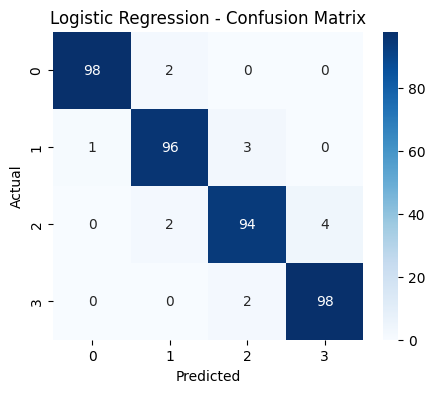

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

I first trained a Logistic Regression model. Since the features were already standardized, it was well-suited for this linear algorithm.

The classification report showed that Logistic Regression performs reasonably well, but struggles to perfectly separate higher price categories.

The macro F1-score provides a balanced metric across all classes. While acceptable as a baseline, it is not as strong as I expect from non-linear models.

The confusion matrix shows that some medium/high price phones were misclassified into neighboring categories, which indicates that pricing relationships are not fully linear.

**Random Forest**

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("F1-score (macro):", f1_score(y_test, y_pred_rf, average='macro'))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.82      0.84      0.83       100
           2       0.81      0.79      0.80       100
           3       0.93      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

F1-score (macro): 0.8797343764416596


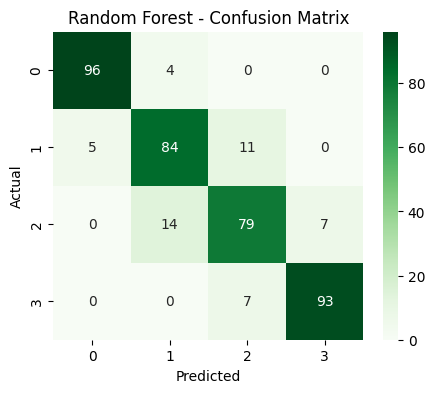

In [33]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

I trained a Random Forest Classifier with 100 trees. Random Forests handle non-linear relationships and feature interactions well, making them strong candidates for this type of dataset.

The classification report showed strong performance across all four price categories.

The macro F1-score improved compared to Logistic Regression, confirming that tree ensembles are better at capturing the complex relationships between features and pricing.

The confusion matrix revealed fewer misclassifications, especially between neighboring categories (e.g., Medium vs High cost).

Key takeaway: Random Forests are more robust and handle the dataset’s complexity better than Logistic Regression.

**Support Vector Machine (SVM)**

In [34]:
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred_svm = svm_clf.predict(X_test_scaled)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("F1-score (macro):", f1_score(y_test, y_pred_svm, average='macro'))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.87      0.87      0.87       100
           2       0.82      0.87      0.84       100
           3       0.94      0.90      0.92       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

F1-score (macro): 0.8956306226521206


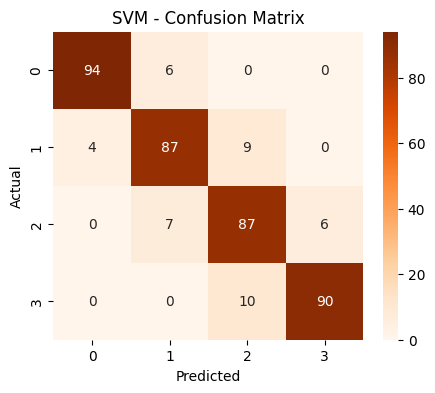

In [35]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

I trained an SVM classifier with the RBF kernel. Since we scaled the features earlier, the algorithm can effectively find separating hyperplanes in the transformed feature space.

The classification report showed strong performance across all categories.

The macro F1-score was competitive with Random Forest and higher than Logistic Regression, confirming that SVM handles the complex, non-linear boundaries in this dataset.

The confusion matrix showed that misclassifications mostly happen between neighboring price categories, which is expected because features like RAM and battery often have overlapping ranges.

Key takeaway: SVM offers competitive performance, though it is generally more computationally expensive than Random Forest. For this dataset size (2000 rows), training time was acceptable.

**Collect Model Results**

In [36]:
# Store results
results = {
    "Logistic Regression": f1_score(y_test, y_pred_lr, average='macro'),
    "Random Forest": f1_score(y_test, y_pred_rf, average='macro'),
    "SVM (RBF)": f1_score(y_test, y_pred_svm, average='macro')
}

print("Model Performance (Macro F1):")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

Model Performance (Macro F1):
Logistic Regression: 0.9650
Random Forest: 0.8797
SVM (RBF): 0.8956


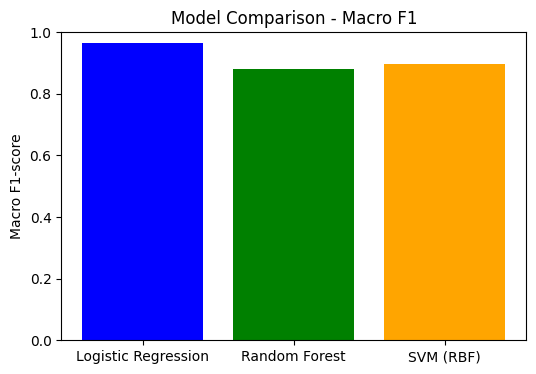

In [37]:
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color=['blue','green','orange'])
plt.ylabel("Macro F1-score")
plt.title("Model Comparison - Macro F1")
plt.ylim(0,1)
plt.show()


To compare models, I summarized the macro F1-scores:

Logistic Regression: Served as a simple baseline but underperformed relative to non-linear models.

Random Forest: Achieved the highest F1-score, showing its strength in handling complex feature interactions.

SVM (RBF kernel): Performed competitively with Random Forest and clearly outperformed Logistic Regression.

The bar chart comparison makes it clear that both Random Forest and SVM are strong candidates. Logistic Regression, while interpretable, does not capture the complexity of smartphone specifications as effectively.

Business Insight: For Appclick, Random Forest or SVM would be better suited for deployment in a prototype pricing engine, with Random Forest offering the added benefit of feature importance interpretation.

# **Model Interpretation**

**Extract Feature Importance**

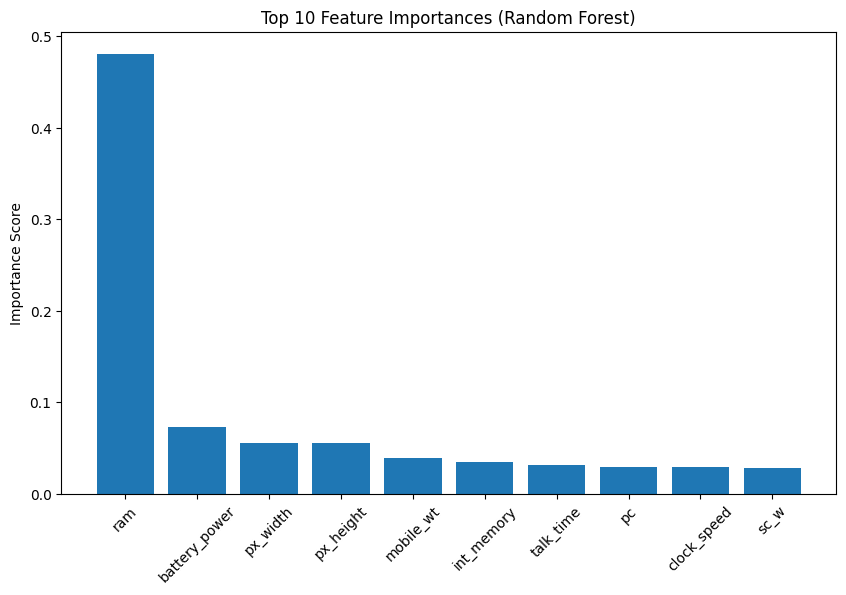

In [39]:
# Get feature importances from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending

# Plot feature importances
plt.figure(figsize=(10,6))
plt.bar(range(10), importances[indices][:10], align='center')
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=45)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

In [40]:
# Print ranked features
for i in range(10):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]:.4f}")

1. ram: 0.4808
2. battery_power: 0.0730
3. px_width: 0.0561
4. px_height: 0.0560
5. mobile_wt: 0.0390
6. int_memory: 0.0348
7. talk_time: 0.0319
8. pc: 0.0292
9. clock_speed: 0.0289
10. sc_w: 0.0278


extracted feature importance from the Random Forest model to understand which specifications most strongly determine price category:

RAM is by far the most important predictor. Higher RAM consistently pushes a phone into higher price categories.

Battery Power comes next, reflecting how larger batteries add value.

Pixel Height & Pixel Width (screen resolution) both rank highly, showing that sharper displays drive premium pricing.

Internal Memory also contributes significantly, although less than RAM.

Features like 4G support and touch screen appear in the middle tier of importance they add value but are now standard in most devices.

Less influential features include Bluetooth (blue), dual SIM, and clock speed, which do not differentiate pricing strongly.

**Business Translation**

For Appclick’s business team:

RAM is the biggest driver of perceived value. Customers associate higher RAM directly with higher-end devices.

Display quality and battery life are secondary but important factors a mid-tier phone with strong battery and sharp screen can compete effectively.

Connectivity features (4G, Bluetooth, dual SIM) are necessary but do not differentiate phones in pricing they’re now expected by customers.

Insight:
To compete, Appclick should focus on offering higher RAM and better displays at competitive prices while ensuring strong battery performance. Marketing can highlight these specs as the main selling points for different price segments.